**Context:**

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

Bank provided data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

**Data Descripsion:**


1-ID: Customer ID


2- Age: Customer’s age in completed years


3- Experience: years of professional experience


4- Income: Annual income of the customer (in thousand dollars)


5- ZIP Code: Home Address ZIP code.


6- Family: the Family size of the customer


7- CCAvg: Average spending on credit cards per month (in thousand dollars)


8- Education: 1: Undergrad; 2: Graduate;3: Advanced/Professional


9- Mortgage: Value of house mortgage if any. (in thousand dollars)


10- Personal_Loan: Did this customer accept the personal loan offered in the last campaign?


11- Securities_Account: Does the customer have securities account with the bank?


12- CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?


13- Online: Do customers use internet banking facilities?


14- CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE 
from sklearn.svm import SVC
from sklearn import model_selection

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
import itertools
from datetime import datetime
import io
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling.csv


In [4]:
data=pd.read_csv(io.StringIO(uploaded['Bank_Personal_Loan_Modelling.csv'].decode('utf-8')))


In [5]:
des=data.head()
cm = sns.light_palette("b", as_cmap=True)
s = des.style.background_gradient(cmap=cm)
s

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.600000,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.500000,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.000000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.700000,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.000000,2,0,0,0,0,0,1


In [6]:
data.shape

(5000, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
des=data.describe().T
cm = sns.light_palette("tan", as_cmap=True)
s = des.style.background_gradient(cmap=cm)
s

,count,mean,std,min,25%,50%,75%,max
ID,5000.000000,2500.500000,1443.520003,1.000000,1250.750000,2500.500000,3750.250000,5000.000000
Age,5000.000000,45.338400,11.463166,23.000000,35.000000,45.000000,55.000000,67.000000
Experience,5000.000000,20.104600,11.467954,-3.000000,10.000000,20.000000,30.000000,43.000000
Income,5000.000000,73.774200,46.033729,8.000000,39.000000,64.000000,98.000000,224.000000
ZIP Code,5000.000000,93152.503000,2121.852197,9307.000000,91911.000000,93437.000000,94608.000000,96651.000000
Family,5000.000000,2.396400,1.147663,1.000000,1.000000,2.000000,3.000000,4.000000
CCAvg,5000.000000,1.937938,1.747659,0.000000,0.700000,1.500000,2.500000,10.000000
Education,5000.000000,1.881000,0.839869,1.000000,1.000000,2.000000,3.000000,3.000000
Mortgage,5000.000000,56.498800,101.713802,0.000000,0.000000,0.000000,101.000000,635.000000
Personal Loan,5000.000000,0.096000,0.294621,0.000000,0.000000,0.000000,0.000000,1.000000


In [9]:
data['Personal Loan'].value_counts().head()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [10]:
data.Experience.describe()

count    5000.000000
mean       20.104600
std        11.467954
min        -3.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [11]:
data[data['Experience'] < 0]['Experience'].count()

52

In [12]:
data[data['Experience'] < 0]['Experience'].value_counts()


-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [13]:
data['Mortgage'].value_counts().head()

0      3462
98       17
103      16
119      16
83       16
Name: Mortgage, dtype: int64

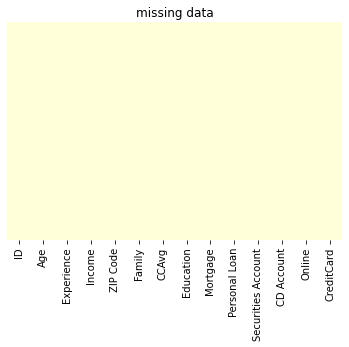

Missing Value:  0


In [14]:
d=data.isnull().sum()
sns.heatmap(data.isnull(),cmap='YlGnBu',cbar=False,yticklabels=False)

plt.title('missing data')
plt.show()
print("Missing Value: ",data.isna().sum().values.sum())

In [15]:
data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

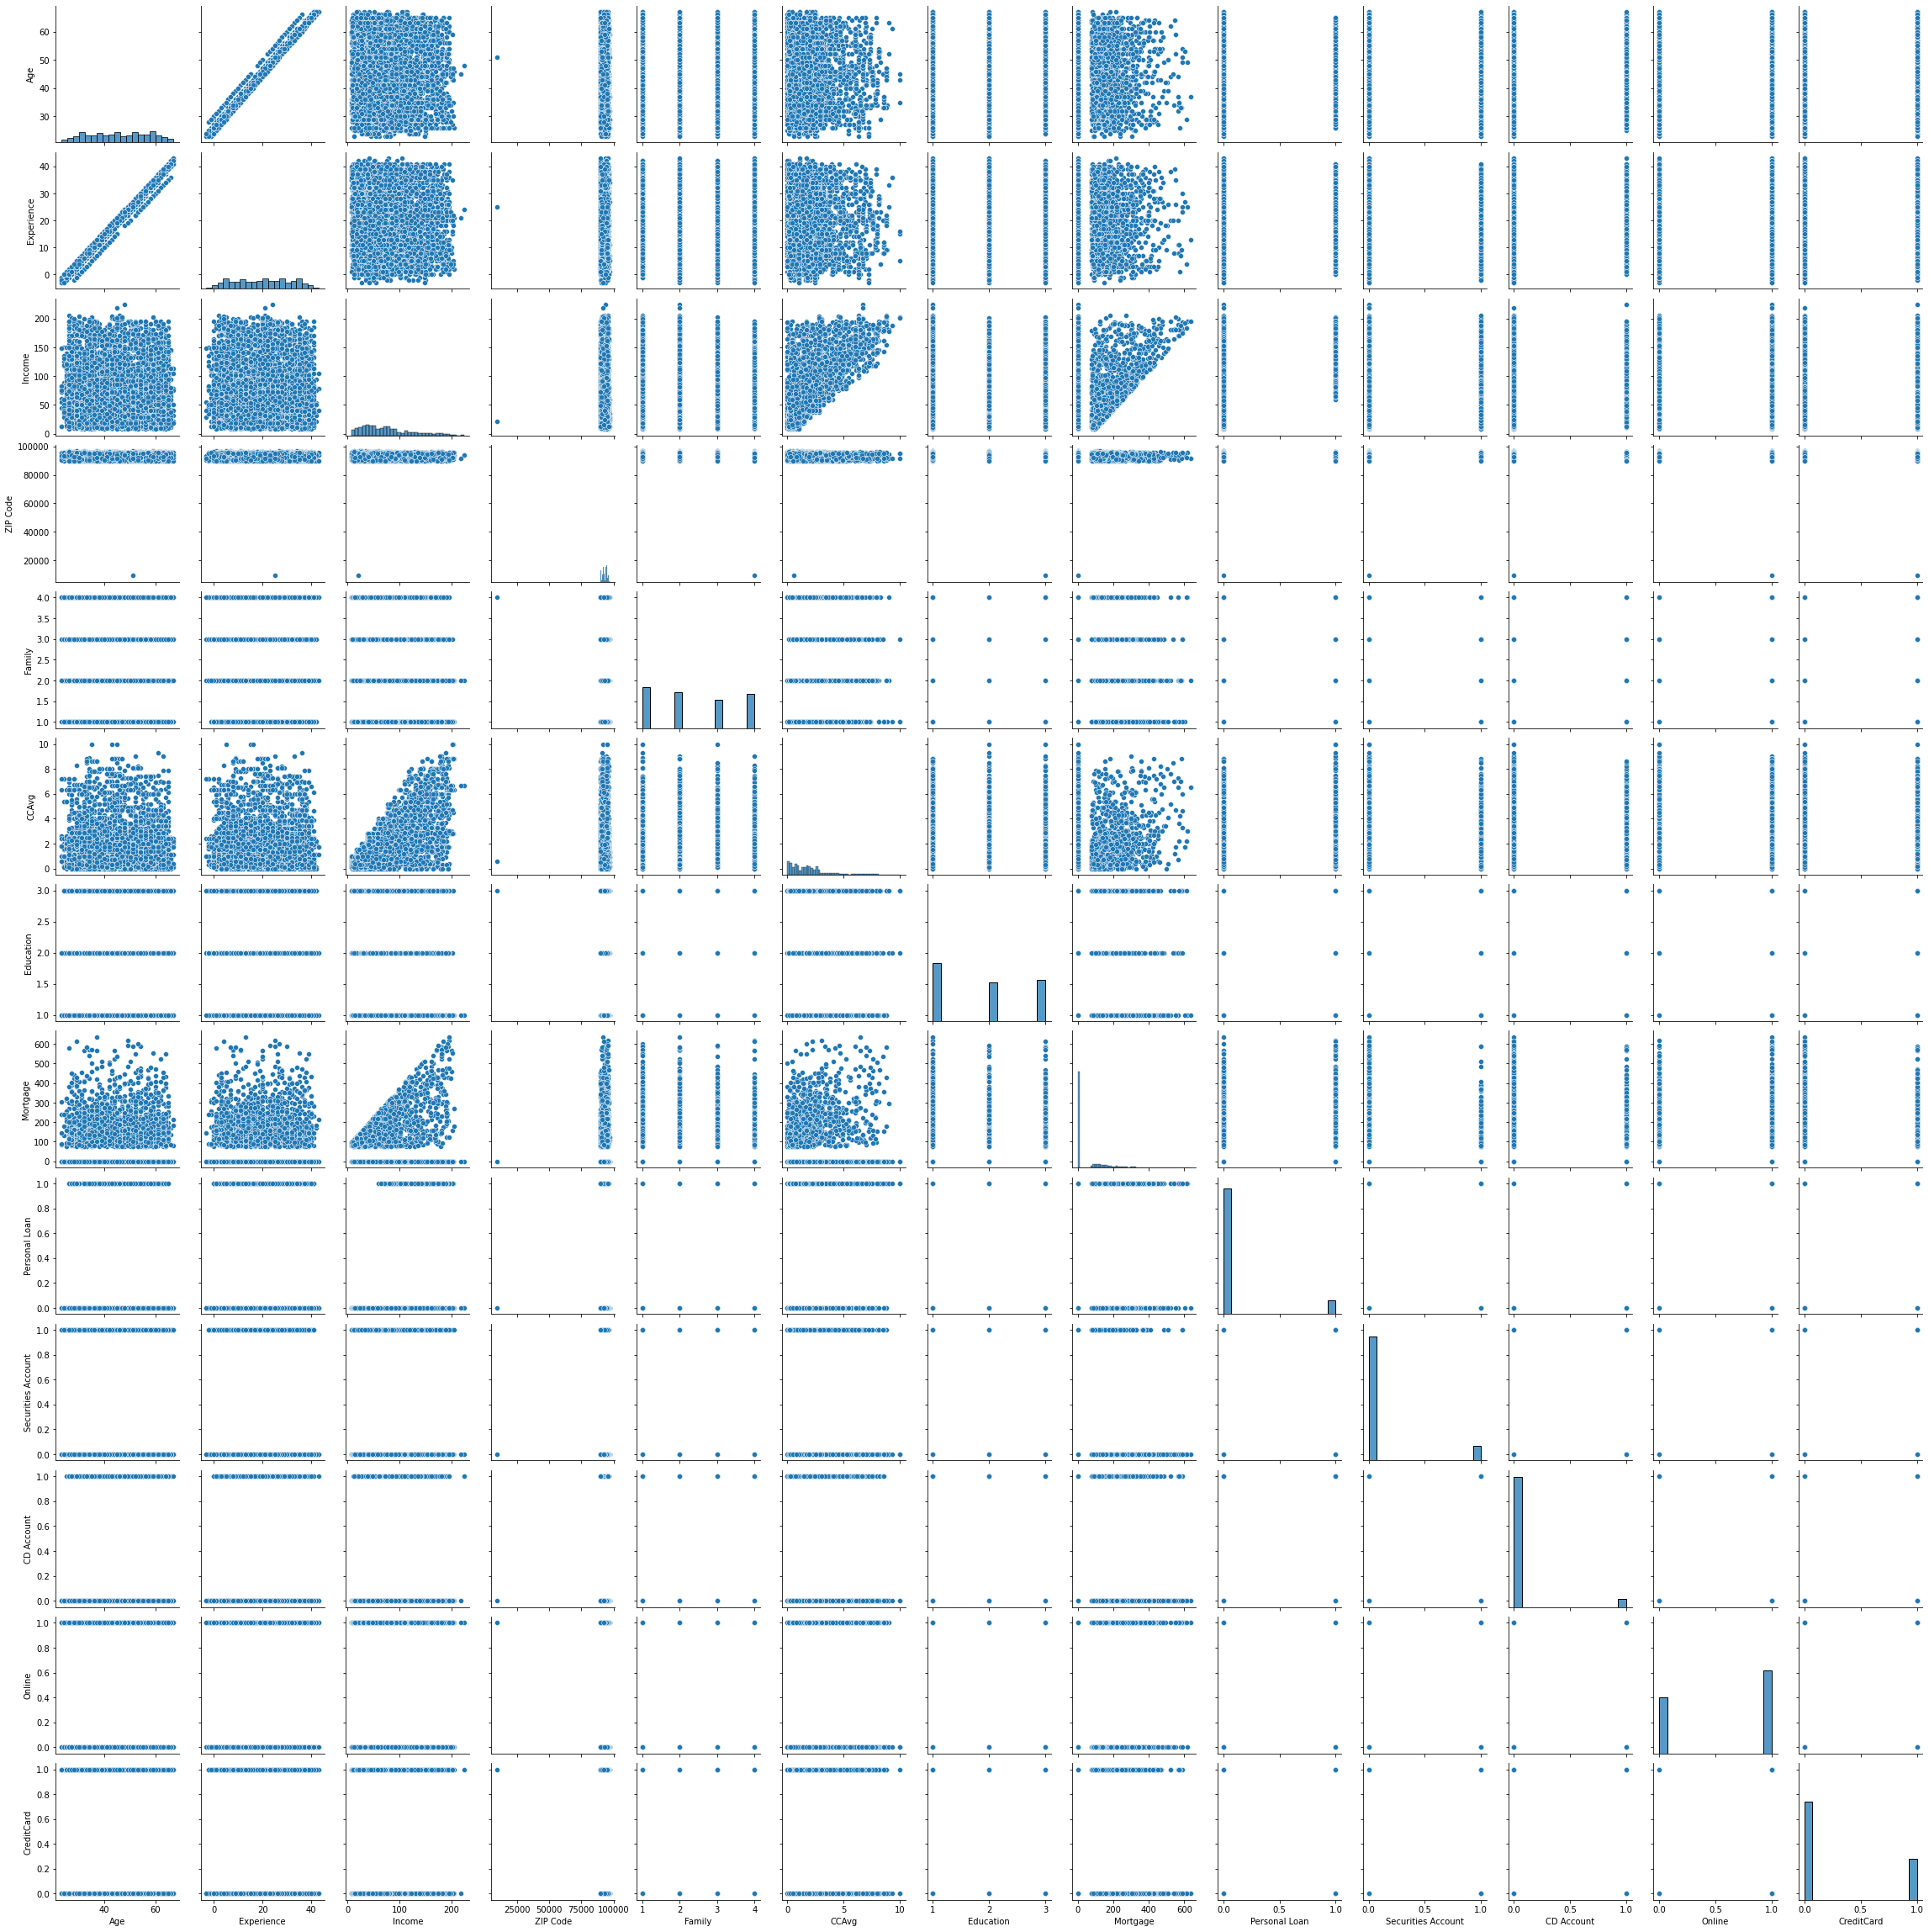

In [16]:
sns.pairplot(data.iloc[:,1:])

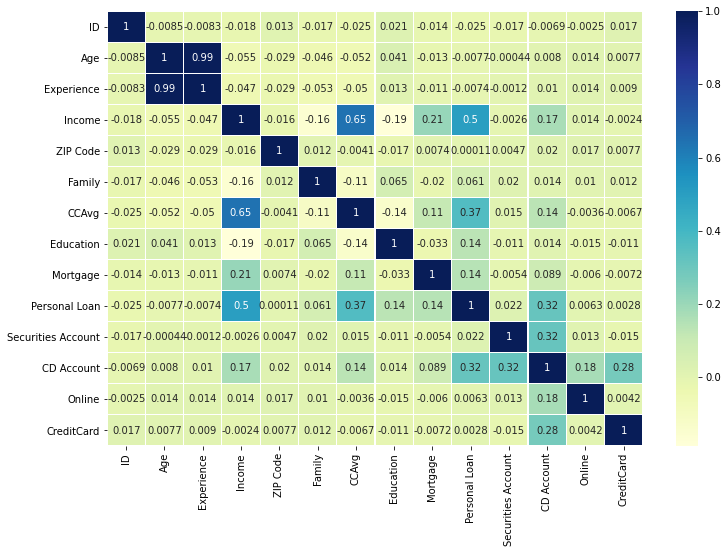

In [17]:
plt.figure(figsize=(12, 8)) 
sns.heatmap(data.corr(), cmap="YlGnBu",  linewidths=.2,annot = True)

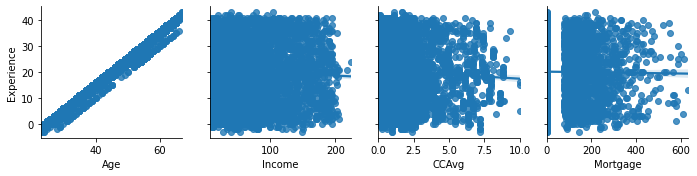

In [18]:
q_Var = ['Age', 'Income', 'CCAvg', 'Mortgage']
expGrid = sns.PairGrid(data, y_vars = 'Experience', x_vars = q_Var)
expGrid.map(sns.regplot)

In [19]:
df_sum = data.describe()

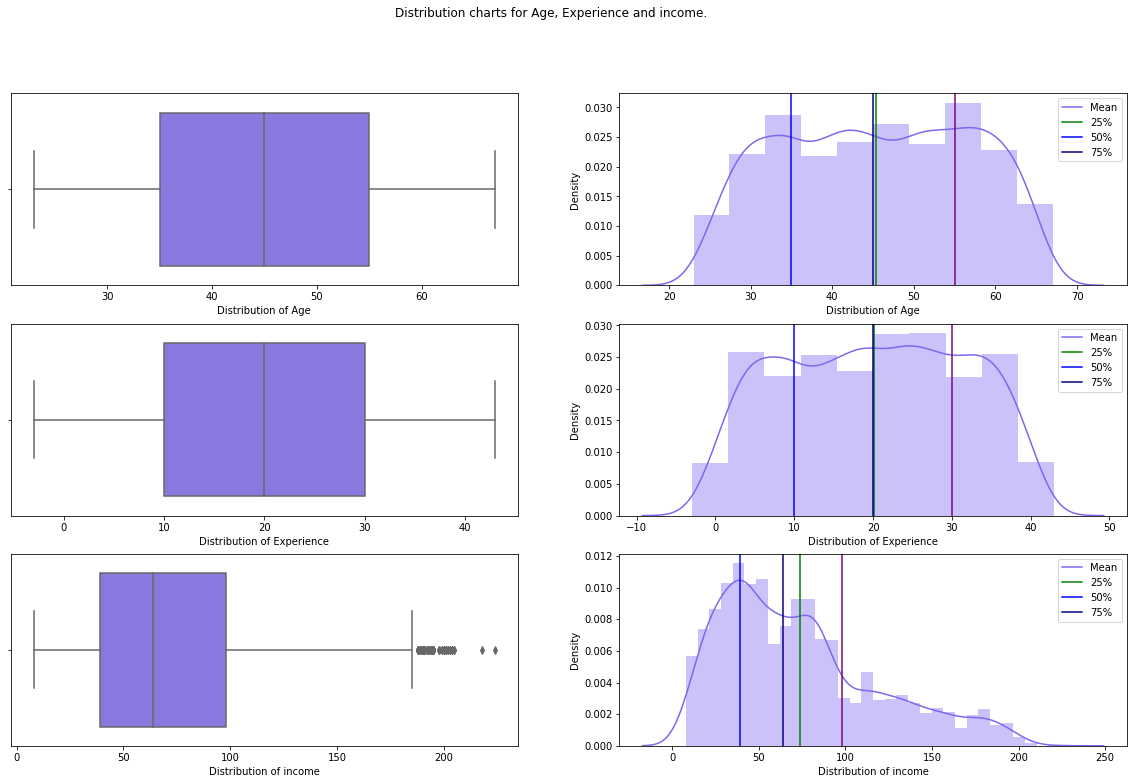

In [20]:
from warnings import filterwarnings
filterwarnings("ignore")

def draw_axvlines(plt, col):
    mean = df_sum.loc["mean", col]
    q1 = df_sum.loc["25%", col]
    q2 = df_sum.loc["50%", col]
    q3 = df_sum.loc["75%", col]
    plt.axvline(mean, color = "g");              # Plotting a line to mark the mean 
    plt.axvline(q1, color = "b");                # Plotting a line to mark Q1 
    plt.axvline(q2, color = "navy");             # Plotting a line to mark Q2 
    plt.axvline(q3, color = "purple");           # Plotting a line to mark Q3
    plt.legend({"Mean": mean, "25%" : q1, "50%" : q2, "75%" : q3});

fig, axes = plt.subplots(3, 2, figsize = (20,12));
fig.suptitle('Distribution charts for Age, Experience and income.');


# Create boxplot and histogram to show distribution of Age
sns.boxplot(data["Age"], ax = axes[0][0], color = "mediumslateblue");
axes[0][0].set(xlabel = 'Distribution of Age');

pp = sns.distplot(data["Age"], ax = axes[0][1], bins = 10, color = "mediumslateblue");
axes[0][1].set(xlabel = 'Distribution of Age');
draw_axvlines(pp, "Age");


# Create boxplot and histogram to show distribution of Experience
sns.boxplot(data["Experience"], ax = axes[1][0], color = "mediumslateblue");
axes[1][0].set(xlabel = 'Distribution of Experience');

pp = sns.distplot(data["Experience"], ax = axes[1][1], bins = 10, color = "mediumslateblue");
axes[1][1].set(xlabel = 'Distribution of Experience');
draw_axvlines(pp, "Experience")


# Create boxplot and histogram to show distribution of Income
sns.boxplot(data["Income"], ax = axes[2][0], color = "mediumslateblue");
axes[2][0].set(xlabel = 'Distribution of income');

pp = sns.distplot(data["Income"], ax = axes[2][1], color = "mediumslateblue");
axes[2][1].set(xlabel = 'Distribution of income');
draw_axvlines(pp, "Income")

Experience The distribution is verry similar to that of Age.

---




In [21]:
data['Experience']=data['Experience'].apply(abs)

In [22]:
data.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [23]:
data['Experience'].value_counts().head()

32    154
20    148
9     147
5     146
23    144
Name: Experience, dtype: int64

In [24]:
data[data['Experience'] < 0]['Experience'].count()

0

In [25]:
data.Experience.describe()

count    5000.000000
mean       20.134600
std        11.415189
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [26]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

**Analyze by visualizing data**

In [27]:
numcols = ['Age', 'Experience', 'Income','CCAvg','Mortgage','Education']

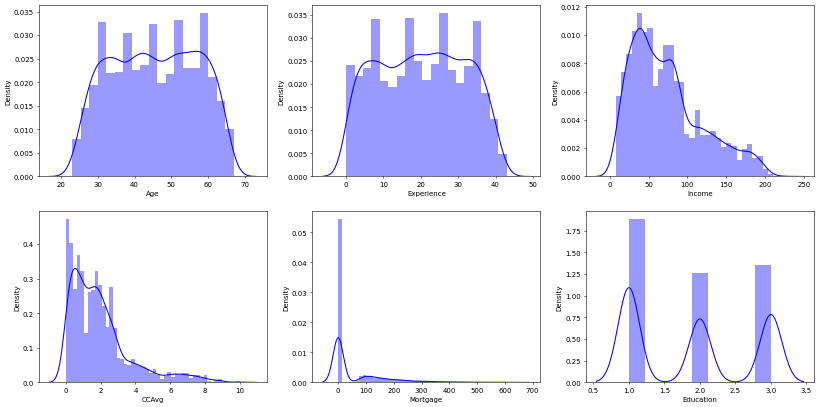

In [28]:
fig, ax = plt.subplots(figsize=(20,10), dpi=50)
for i in range(0,len(numcols)):
    plt.subplot(2,3,i+1)
    sns.distplot(data[numcols[i]],color="b")
    plt.xlabel(numcols[i])
  

In [29]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

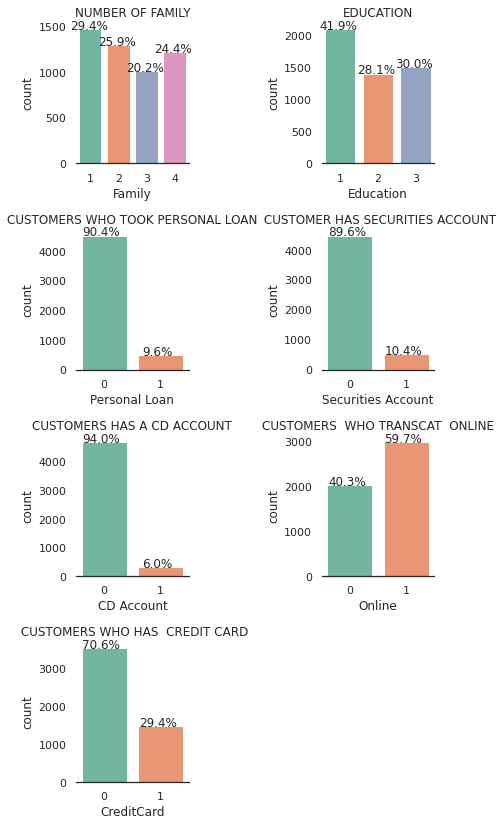

In [30]:

cat_columns = ['Family',   'Education',   'Personal Loan',   'Securities Account',
               'CD Account',   'Online',   'CreditCard']
title=['Number of Family', 'Education','Customers who took Personal Loan',
       ' Customer has Securities Account','Customers has a CD Account',
       'Customers  who transcat  Online',' Customers who has  Credit Card']
plt.figure(figsize=(7,14))

sns.set_theme(style="white") # just trying to make visualisation better. This will set background to white
#list_palette=['Blues_r','Greens_r','Purples_r','Reds_r','Blues_r','Greens_r','Purples_r','Reds_r','Blues_r']

for i, variable in enumerate(cat_columns):
                     plt.subplot(5,2,i+1)
                     order = data[variable].value_counts(ascending=False).index   
                     #sns.set_palette(list_palette[i]) # to set the palette
                     sns.set_palette('Set2')
                     ax=sns.countplot(x=data[variable], data=data )
                     sns.despine(top=True,right=True,left=True) # to remove sijjde line from graph
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(data[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.tight_layout()
                     plt.title(title[i].upper())
                                     

In [31]:
loan_counts = pd.DataFrame(data["Personal Loan"].value_counts()).reset_index()
loan_counts.columns =["Labels","Personal Loan"]
loan_counts

,Labels,Personal Loan
0,0,4520
1,1,480


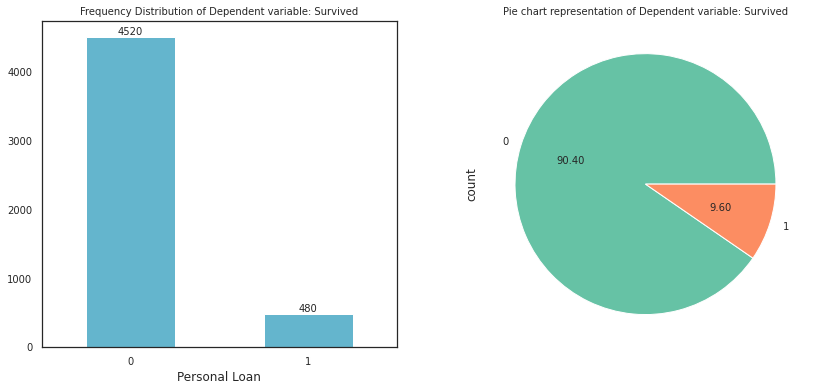

In [32]:
#Report business
fig, ax = plt.subplots(nrows=1, ncols=2,squeeze=True)
fig.set_size_inches(14,6)
frequency_colums= pd.crosstab(index=data["Personal Loan"],columns="count")
frequency_colums.plot(kind='bar',ax=ax[0],color="c",legend=False,rot=True,fontsize=10)
frequency_colums.plot(kind='pie',ax=ax[1],subplots=True,legend=False,fontsize=10,autopct='%.2f')
ax[0].set_title('Frequency Distribution of Dependent variable: Survived',fontsize=10)
ax[1].set_title('Pie chart representation of Dependent variable: Survived',fontsize=10)

#adding the text labels
rects = ax[0].patches
labels = frequency_colums["count"].values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax[0].text(rect.get_x() + rect.get_width()/2, height +1,label, ha='center', va='bottom',fontsize=10)
plt.show()

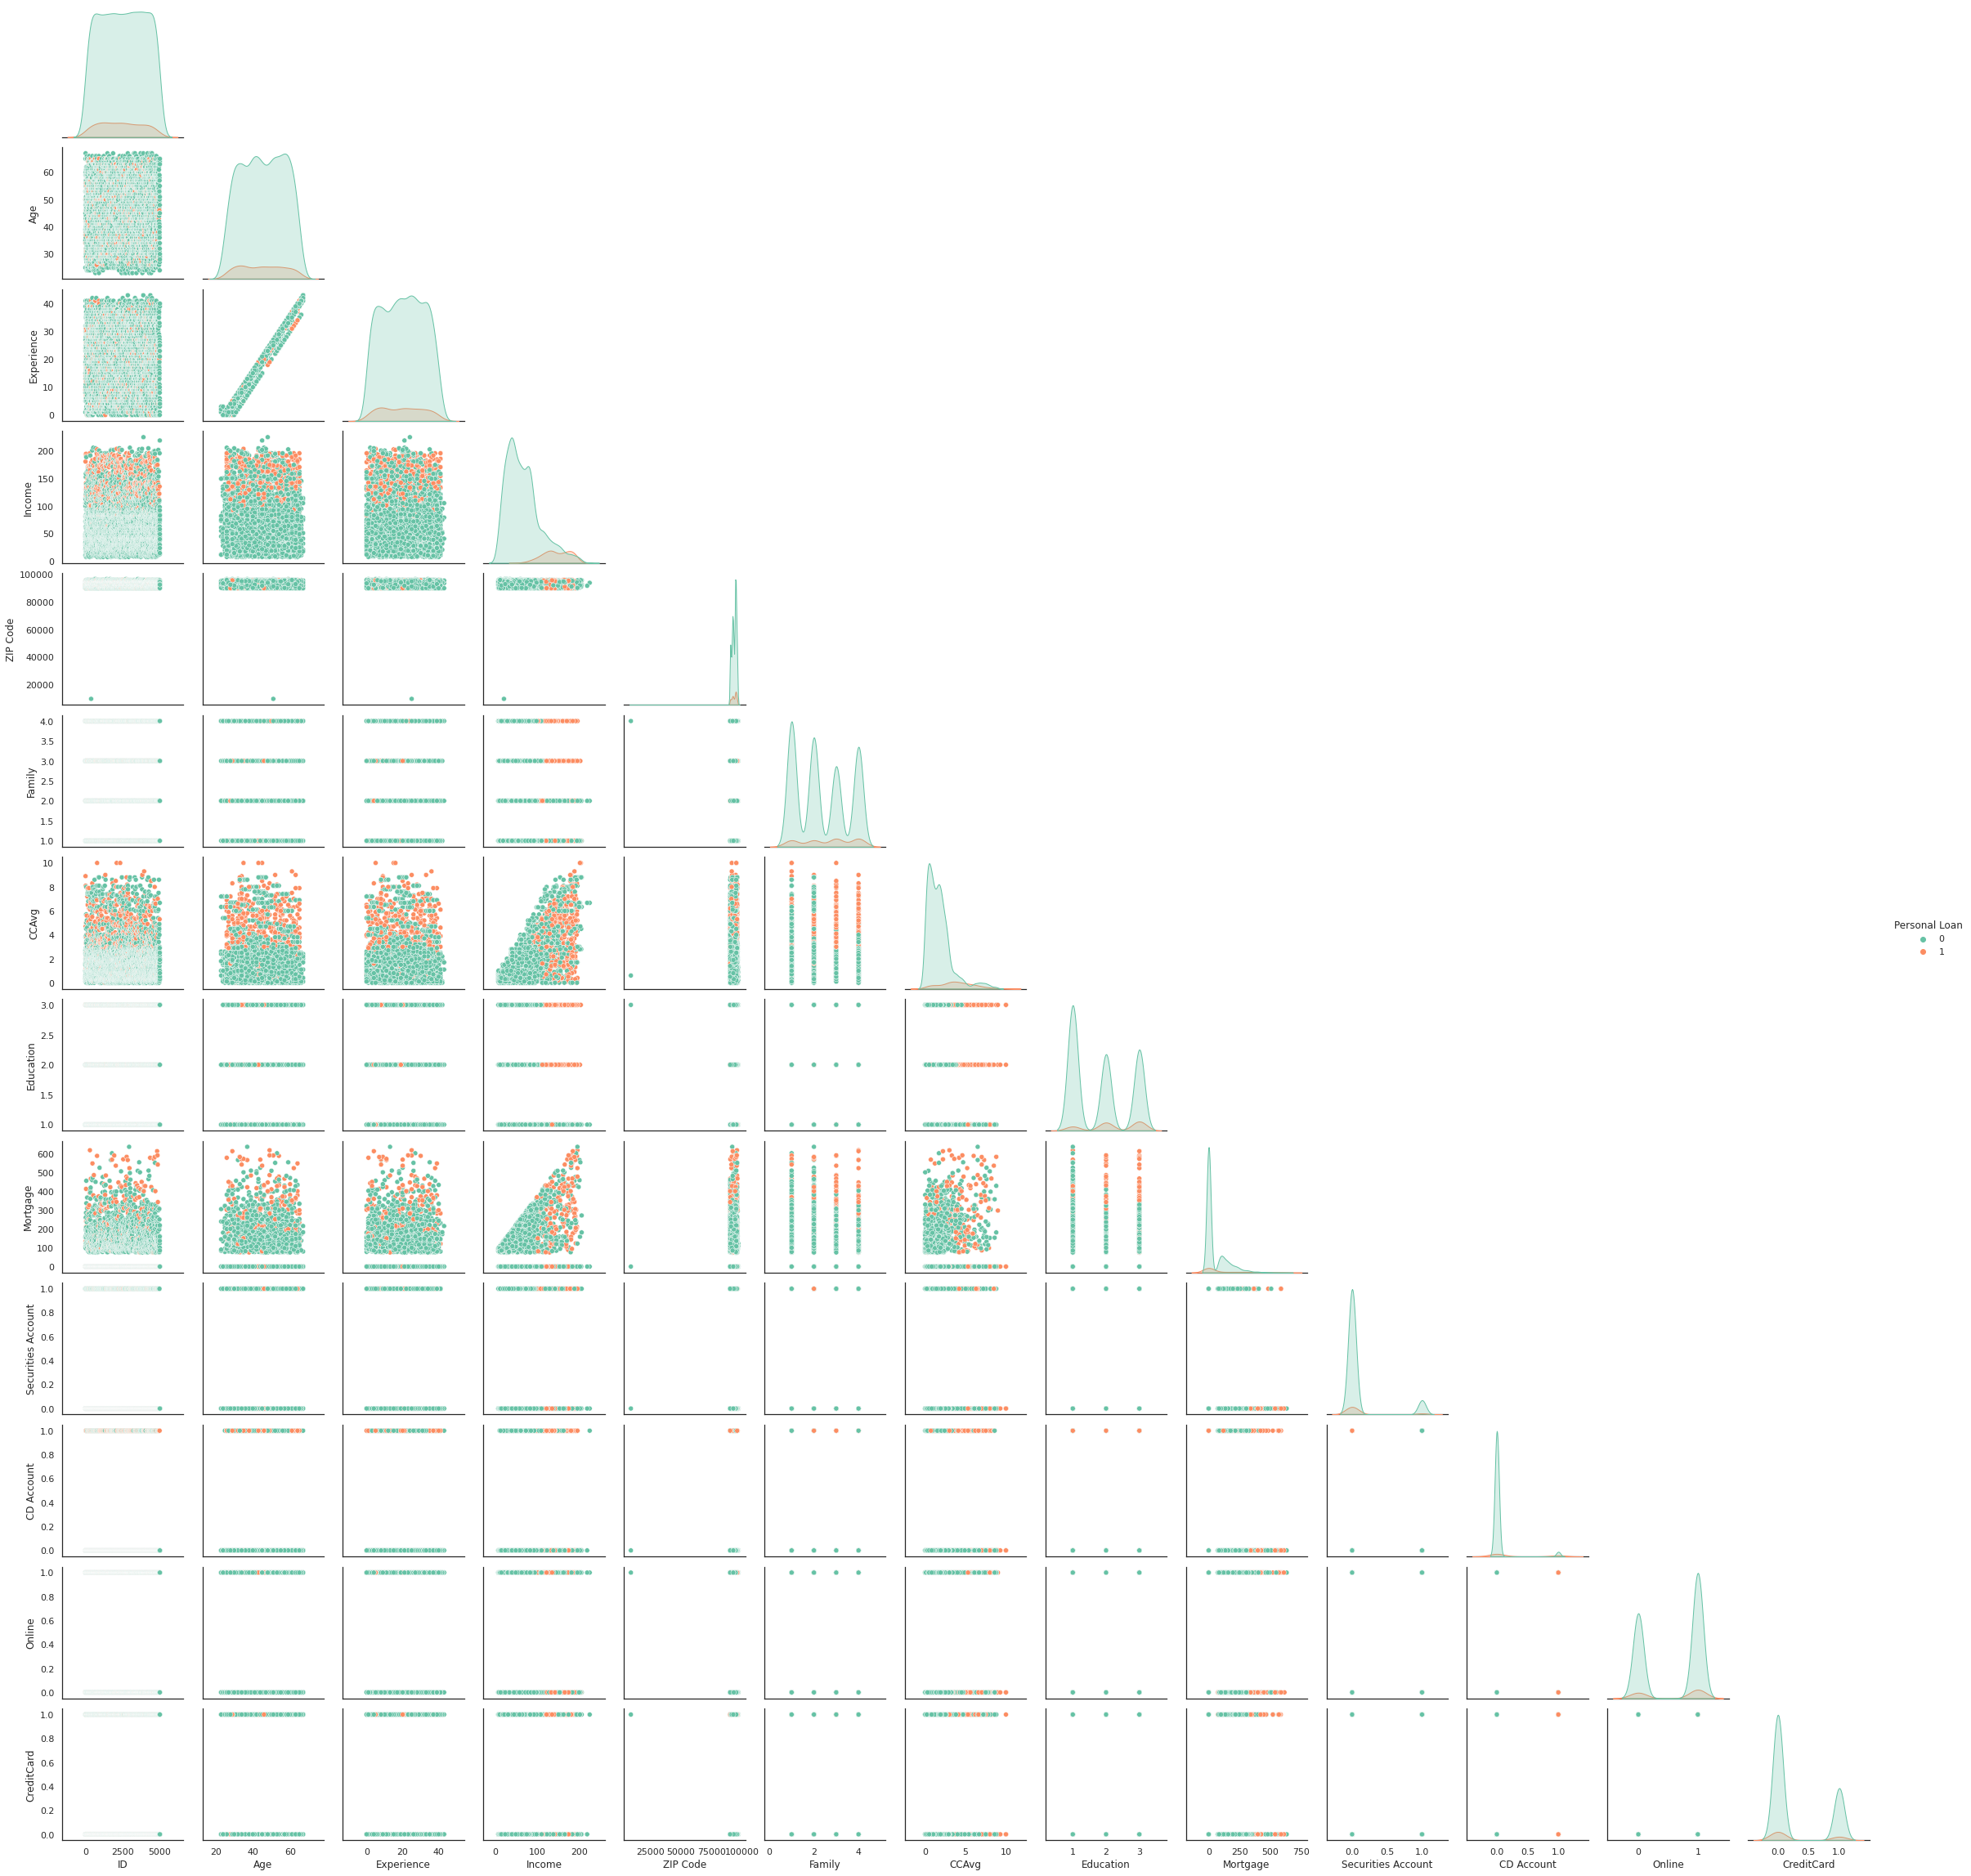

In [33]:
sns.set_palette(sns.color_palette("Set2", 8))
sns.pairplot(data, hue="Personal Loan",corner=True)
plt.show()

In [34]:
def cat_view(x = 'Education'):
    """
    Function to create a Bar chart and a Pie chart for categorical variables.
    """
    from matplotlib import cm
    color1 = cm.inferno(np.linspace(.4, .8, 30))
    color2 = cm.viridis(np.linspace(.4, .8, 30))
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
     
    """
    Draw a Pie Chart on first subplot.
    """    
    s = data.groupby(x).size()

    mydata_values = s.values.tolist()
    mydata_index = s.index.tolist()

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}%\n({:d})".format(pct, absolute)


    wedges, texts, autotexts = ax[0].pie(mydata_values, autopct=lambda pct: func(pct, mydata_values),
                                      textprops=dict(color="w"))

    ax[0].legend(wedges, mydata_index,
              title="Index",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=12, weight="bold")

    ax[0].set_title(f'{x.capitalize()} Piechart')
    
    
    """
    Draw a Bar Graph on second subplot.
    """
    
    df = pd.pivot_table(data, index = [x], columns = ['Personal Loan'], values = ['Income'], aggfunc = len)

    labels = df.index.tolist()
    loan_no = df.values[:, 0].tolist()
    loan_yes = df.values[:, 1].tolist()
    
    l = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    rects1 = ax[1].bar(l - width/2, loan_no, width, label='No Loan', color = 'tan')
    rects2 = ax[1].bar(l + width/2, loan_yes, width, label='Loan', color = 'pink')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    
    ax[1].set_ylabel('Scores')
    ax[1].set_title(f'{x.capitalize()} Bar Graph')
    ax[1].set_xticks(l)
    ax[1].set_xticklabels(labels)
    ax[1].legend()
    
    def autolabel(rects):
        
        """Attach a text label above each bar in *rects*, displaying its height."""
        
        for rect in rects:
            height = rect.get_height()
            ax[1].annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        fontsize = 'large',   
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()


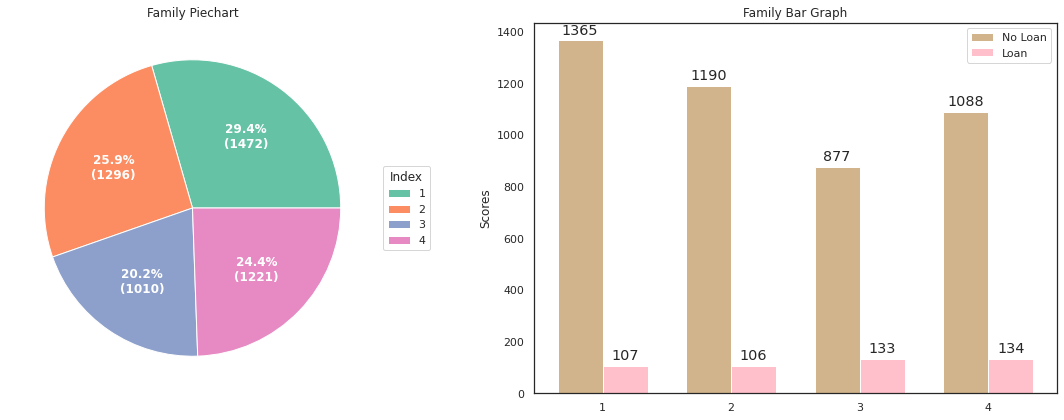

In [35]:
cat_view('Family')


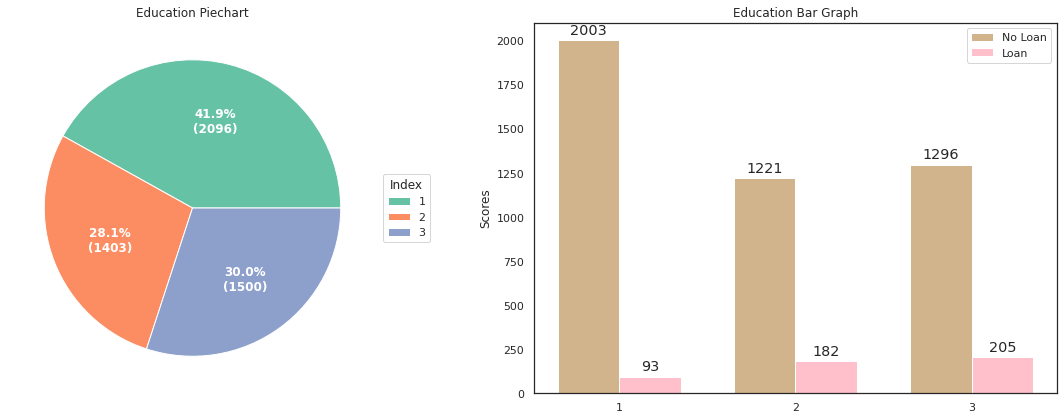

In [36]:
cat_view('Education')

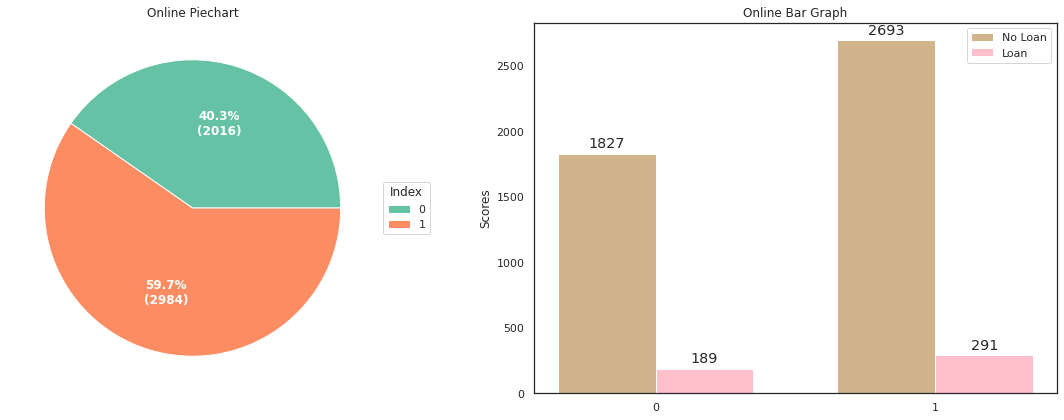

In [37]:
cat_view('Online')

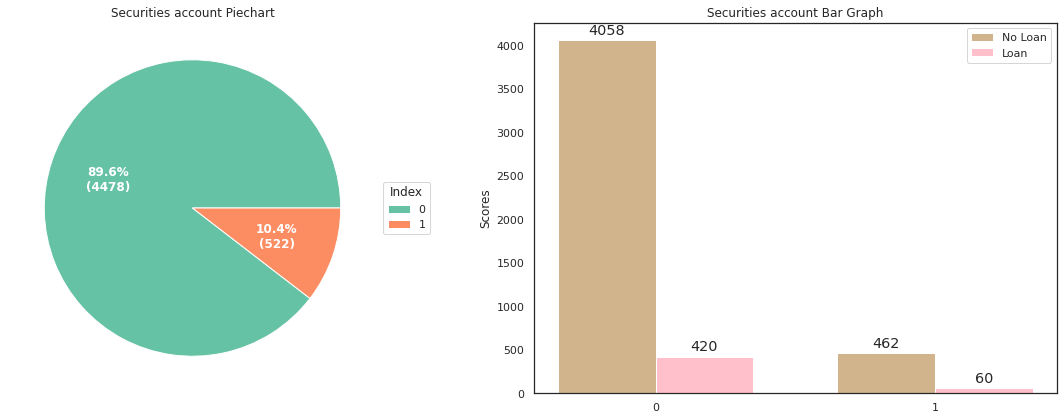

In [38]:
cat_view('Securities Account')

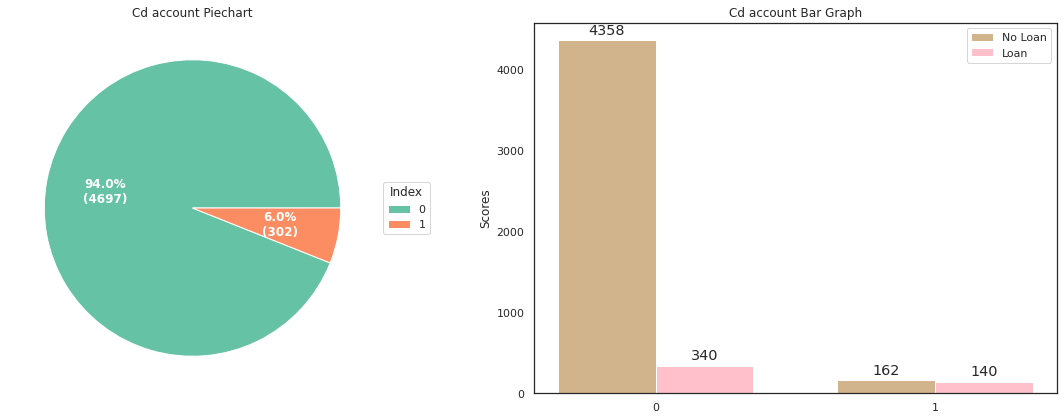

In [39]:
cat_view('CD Account')

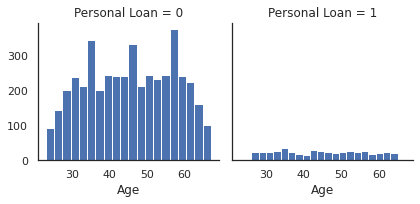

In [40]:
A= sns.FacetGrid(data, col='Personal Loan')
A.map(plt.hist,'Age', bins=20,color='b')

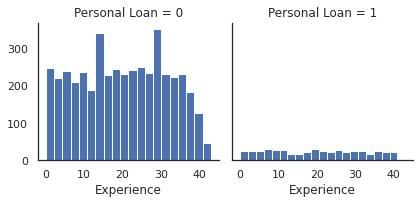

In [41]:
E= sns.FacetGrid(data, col='Personal Loan')
E.map(plt.hist,'Experience', bins=20,color='b')

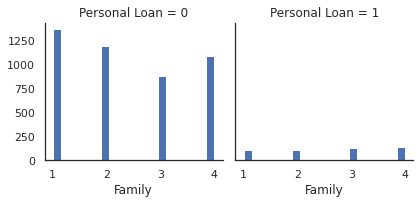

In [42]:
F= sns.FacetGrid(data, col='Personal Loan')
F.map(plt.hist,'Family', bins=20,color='b')

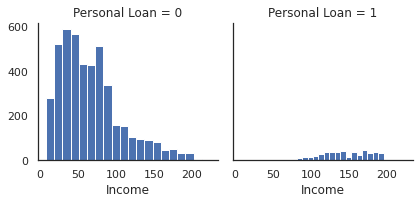

In [43]:
I = sns.FacetGrid(data, col='Personal Loan')
I.map(plt.hist,'Income', bins=20,color='b')

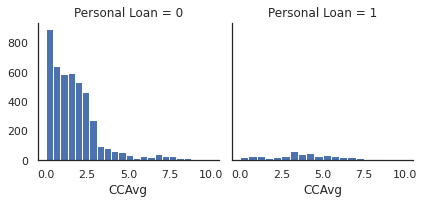

In [44]:
C= sns.FacetGrid(data, col='Personal Loan')
C.map(plt.hist,'CCAvg', bins=20,color='b')

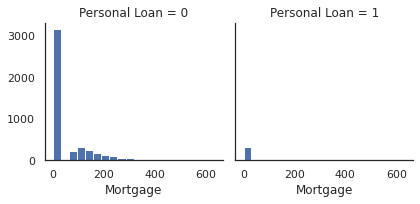

In [45]:
M= sns.FacetGrid(data, col='Personal Loan')
M.map(plt.hist,'Mortgage', bins=20,color='b')

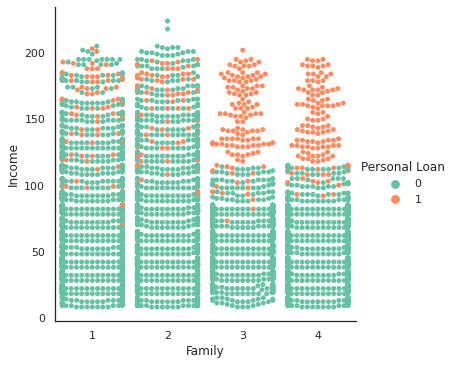

In [46]:
filterwarnings("ignore")

sns.catplot(x='Family', y='Income', hue='Personal Loan', data = data, kind='swarm') #Report businesss

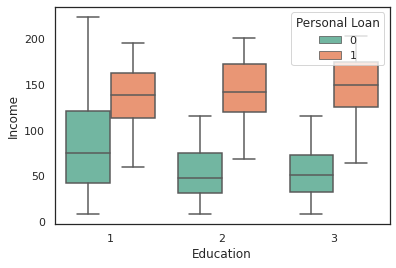

In [47]:
sns.boxplot(x='Education', y='Income', hue='Personal Loan', data = data)

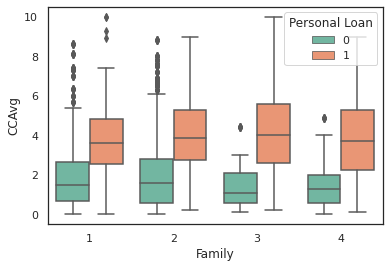

In [48]:
sns.boxplot(x='Family',y='CCAvg',hue='Personal Loan',data=data)

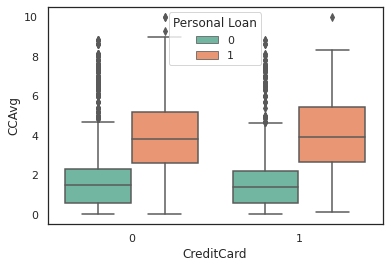

In [49]:
sns.boxplot(x="CreditCard", y='CCAvg', hue="Personal Loan", data=data)

Text(0.5, 1.0, 'Income and CCAvg Scatter Distribution')

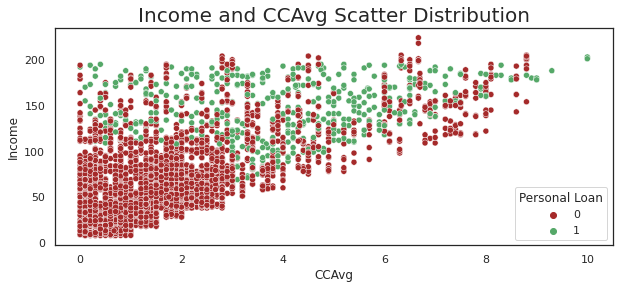

In [50]:
plt.figure(figsize=(10,4))
sns.scatterplot(data.CCAvg, data.Income, hue = data['Personal Loan'], palette= ['Brown','g'])

plt.title('Income and CCAvg Scatter Distribution',fontsize=20)

Text(0.5, 1.0, 'Income and  Mortgage Distribution')

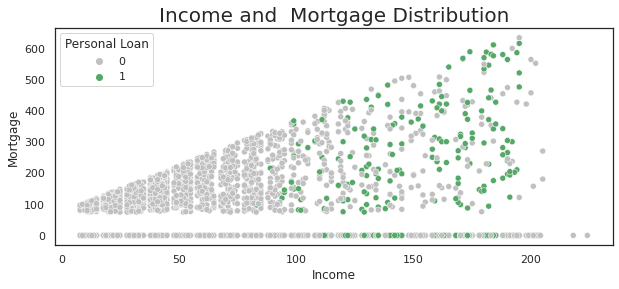

In [51]:
plt.figure(figsize=(10,4))
sns.scatterplot(data.Income, data.Mortgage,hue = data['Personal Loan'], palette= ['Silver','g'])

plt.title('Income and  Mortgage Distribution',fontsize=20)

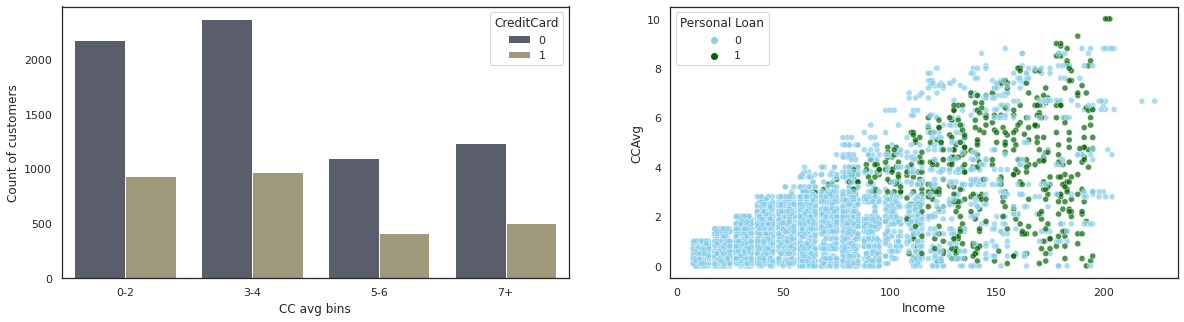

In [52]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))

xx = data[["CCAvg", "CreditCard", "Personal Loan"]]
xx['ccavg_bin'] = pd.cut(xx['CCAvg'], bins = [0, 2, 4, 6, 100], labels = ['0-2', '3-4', '5-6', '7+'])
xx = xx.groupby(["ccavg_bin", "CreditCard"])["CCAvg"].sum().reset_index()
sns.barplot(xx["ccavg_bin"], xx["CCAvg"], hue = xx["CreditCard"], palette= "cividis", ax=axes[0]);
axes[0].set(xlabel = 'CC avg bins', ylabel = 'Count of customers');

sns.scatterplot(x = "Income", y = "CCAvg", data = data, hue = "Personal Loan", ax = axes[1], palette=["skyblue", "darkgreen"], alpha = 0.7)

** Model Building **

In [53]:

def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    ax = plt.gca()
    ax.set_ylim(-.5, 5.5)
        
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [54]:
def perform_model(model, X_train, y_train, X_test, y_test,class_labels, cm_normalize=True,print_cm=True, cm_cmap=plt.cm.Reds):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    
    return results

In [55]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))


In [56]:
df = data.drop(['ID','ZIP Code'], axis=1)

In [57]:
df.head(1)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0


In [58]:
labels=[0,1]

In [59]:
X = df.drop('Personal Loan',axis=1)
y=df['Personal Loan']

In [60]:
from imblearn.over_sampling import SMOTE 

In [61]:
ms=SMOTE(random_state=1)
X_ms , y_ms = ms.fit_resample(X,y)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_ms, y_ms, test_size=0.30, random_state=1)
print('x train data {}'.format(X_train.shape))
print('y train data {}'.format(y_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))

x train data (6328, 11)
y train data (6328,)
x test data  (2712, 11)
y test data  (2712,)


# Logistic Regression


In [76]:
from warnings import filterwarnings
filterwarnings("ignore")
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Done 
 

training_time(HH:MM:SS.ms) - 0:00:01.411133


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.001530


---------------------
|      Accuracy      |
---------------------

    0.8938053097345132


--------------------
| Confusion Matrix |
--------------------

 [[1202  148]
 [ 140 1222]]
-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1350
           1       0.89      0.90      0.89      1362

    accuracy                           0.89      2712
   macro avg       0.89      0.89      0.89      2712
weighted avg       0.89      0.89      0.89      2712



[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.3s finished


# KNN

In [64]:
parameters = {'n_neighbors': [1,3, 10, 11,]}
log_knn = KNeighborsClassifier(n_neighbors=6)
log_knn_grid = GridSearchCV(log_knn, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_knn_grid_results =  perform_model(log_knn_grid, X_train, y_train, X_test, y_test, class_labels=labels)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


training the model..
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Done 
 

training_time(HH:MM:SS.ms) - 0:00:01.172055


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.117724


---------------------
|      Accuracy      |
---------------------

    0.9487463126843658


--------------------
| Confusion Matrix |
--------------------

 [[1227  123]
 [  16 1346]]
-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1350
           1       0.92      0.99      0.95      1362

    accuracy                           0.95      2712
   macro avg       0.95      0.95      0.95      2712
weighted avg       0.95      0.95      0.95      2712



[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    1.1s finished


In [77]:
print_grid_search_attributes(log_knn_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'n_neighbors': 1}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9375791855712036



# Naive Bayes

In [78]:
log_NB = GaussianNB()
log_NB_grid_results =  perform_model(log_NB, X_train, y_train, X_test, y_test, class_labels=labels)

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:00.012476


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.001339


---------------------
|      Accuracy      |
---------------------

    0.8573008849557522


--------------------
| Confusion Matrix |
--------------------

 [[1198  152]
 [ 235 1127]]
-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1350
           1       0.88      0.83      0.85      1362

    accuracy                           0.86      2712
   macro avg       0.86      0.86      0.86      2712
weighted avg       0.86      0.86      0.86      2712



# Linear SVC

In [79]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

training the model..
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.7s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:08.162304


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.000517


---------------------
|      Accuracy      |
---------------------

    0.8820058997050148


--------------------
| Confusion Matrix |
--------------------

 [[1219  131]
 [ 189 1173]]
-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1350
           1       0.90      0.86      0.88      1362

    accuracy                           0.88      2712
   macro avg       0.88      0.88      0.88      2712
weighted avg       0.88      0.88      0.88      2712



# Kernel SVM

In [80]:
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:53.632448


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.195631


---------------------
|      Accuracy      |
---------------------

    0.9782448377581121


--------------------
| Confusion Matrix |
--------------------

 [[1297   53]
 [   6 1356]]
-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1350
           1       0.96      1.00      0.98      1362

    accuracy                           0.98      2712
   macro avg       0.98      0.98      0.98      2712
weighted avg       0.98      0.98      0.98      2712



In [81]:
print_grid_search_attributes(rbf_svm_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=16, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0078125, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 16, 'gamma': 0.0078125}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9682348313133395



# Random Forest 

In [82]:
params = {'n_estimators': np.arange(10,500,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(rfc_grid_results['model'])

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:12:04.526889


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.023938


---------------------
|      Accuracy      |
---------------------

    0.9926253687315634


--------------------
| Confusion Matrix |
--------------------

 [[1336   14]
 [   6 1356]]
-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1350
           1       0.99      1.00      0.99      1362

    accuracy                           0.99      2712
   macro avg       0.99      0.99      0.99      2712
weighted avg       0.99      0.99      0.99      2712

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=13, max_features='auto',
                       max_

# Comparing all models


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 89.38%       10.62%
KNN                 : 94.87%       5.125% 
Naive Bayes         : 85.73%       14.27% 
Linear SVC          : 88.2%        11.8% 
Kernel SVM          : 97.82%       2.176% 
Random Forest       : 99.26%       0.7375 % 


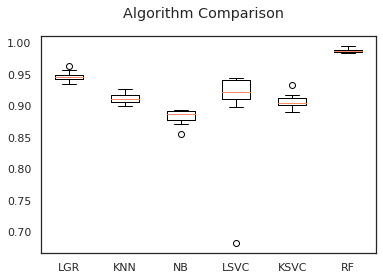

In [86]:
from warnings import filterwarnings
filterwarnings("ignore")

models = []
models.append(('LGR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('LSVC', LinearSVC()))
models.append(('KSVC', SVC()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())

print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))
print('KNN                 : {:.04}%       {:.04}% '.format(log_knn_grid_results['accuracy'] * 100,\
                                                        100-(log_knn_grid_results['accuracy'] * 100)))
print('Naive Bayes         : {:.04}%       {:.04}% '.format(log_NB_grid_results['accuracy'] * 100,\
                                                        100-(log_NB_grid_results['accuracy'] * 100)))
print('Linear SVC          : {:.04}%        {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                           100-(lr_svc_grid_results['accuracy'] * 100)))
print('Kernel SVM          : {:.04}%       {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                           100-(rbf_svm_grid_results['accuracy'] * 100)))
print('Random Forest       : {:.04}%       {:.04} % '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

